# Secom Dosyası Üzerinden İşlemler

**Data Manipulasyonu yapılacak**

_Let's Begin_


\\( P(A \mid B) = \frac{P(B \mid A) \, P(A)}{P(B)} \\)


In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as p
import sys
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from sklearn.cross_validation import train_test_split
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from ipywidgets import FloatProgress
from IPython.display import display
plt.rcParams['figure.figsize'] = [20, 10]
df = pd.read_csv("/home/elci/predy/PredY/secom/data/Secom_csv.csv") 

In [123]:
df.head(10)

,Unnamed: 0,Fail,Tarih,X1,X2,X3,X4,X5,X6,X7,...,X581,X582,X583,X584,X585,X586,X587,X588,X589,X590
0,1,0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,2,0,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,3,1,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,4,0,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,5,0,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
5,6,0,2008-07-19 17:53:00,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,...,0.0052,44.0077,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077
6,7,0,2008-07-19 19:44:00,3030.27,2430.12,2230.4222,1463.6606,0.8294,100.0,102.3433,...,NaN,NaN,0.5010,0.0143,0.0042,2.8515,0.0342,0.0151,0.0052,44.0077
7,8,0,2008-07-19 19:45:00,3058.88,2690.15,2248.9000,1004.4692,0.7884,100.0,106.2400,...,0.0063,95.0310,0.4984,0.0106,0.0034,2.1261,0.0204,0.0194,0.0063,95.0310
8,9,0,2008-07-19 20:24:00,2967.68,2600.47,2248.9000,1004.4692,0.7884,100.0,106.2400,...,0.0045,111.6525,0.4993,0.0172,0.0046,3.4456,0.0111,0.0124,0.0045,111.6525
9,10,0,2008-07-19 21:35:00,3016.11,2428.37,2248.9000,1004.4692,0.7884,100.0,106.2400,...,0.0073,90.2294,0.4967,0.0152,0.0038,3.0687,0.0212,0.0191,0.0073,90.2294


In [124]:
df.describe()

,Unnamed: 0,Fail,X1,X2,X3,X4,X5,X6,X7,X8,...,X581,X582,X583,X584,X585,X586,X587,X588,X589,X590
count,1567.00000,1567.000000,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,...,618.000000,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000
mean,784.00000,0.066369,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,...,0.005396,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066
std,452.49825,0.249005,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,...,0.003116,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919
min,1.00000,0.000000,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,...,0.001000,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000
25%,392.50000,0.000000,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,...,0.003400,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600
50%,784.00000,0.000000,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,...,0.004700,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500
75%,1175.50000,0.000000,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,...,0.006475,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700
max,1567.00000,1.000000,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,...,0.028600,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800


In [125]:
df['Fail'].value_counts()

0    1463
1     104
Name: Fail, dtype: int64

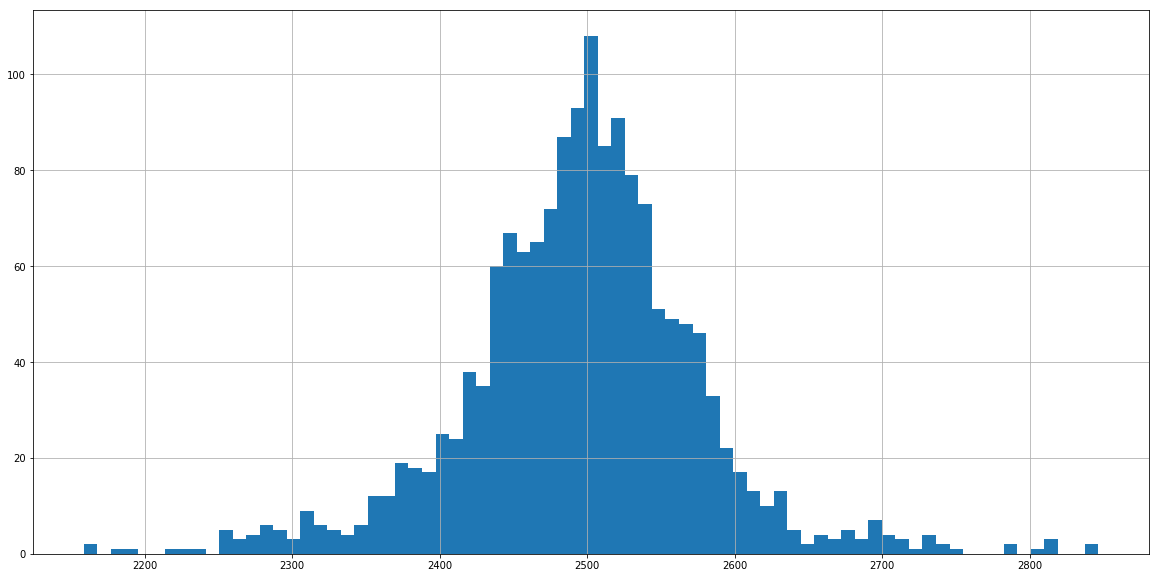

In [126]:
df['X2'].hist(bins=75)

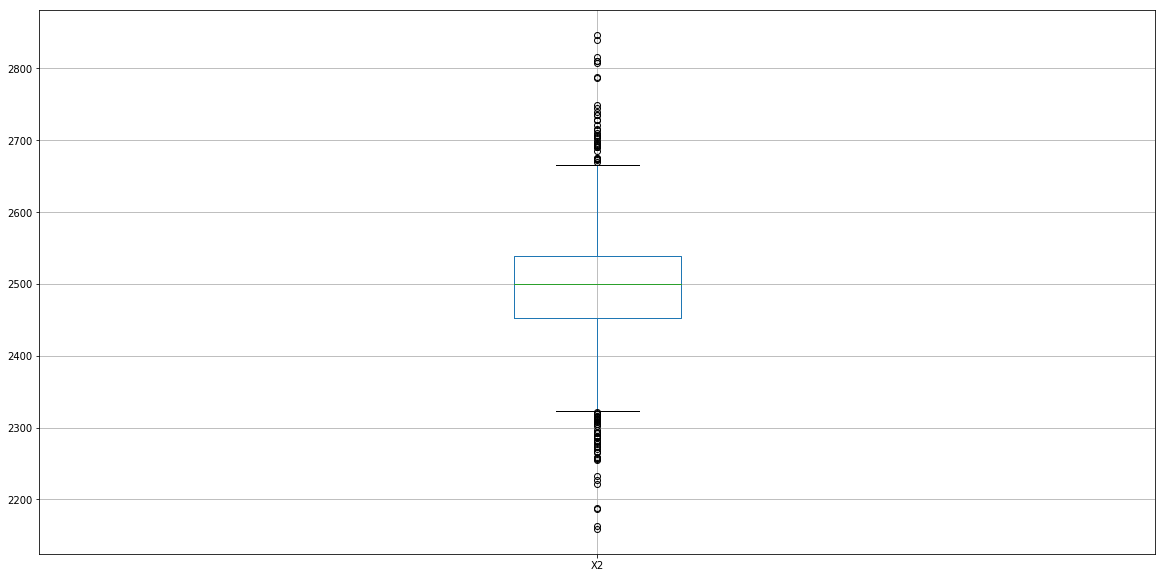

In [127]:
df.boxplot(column='X2')

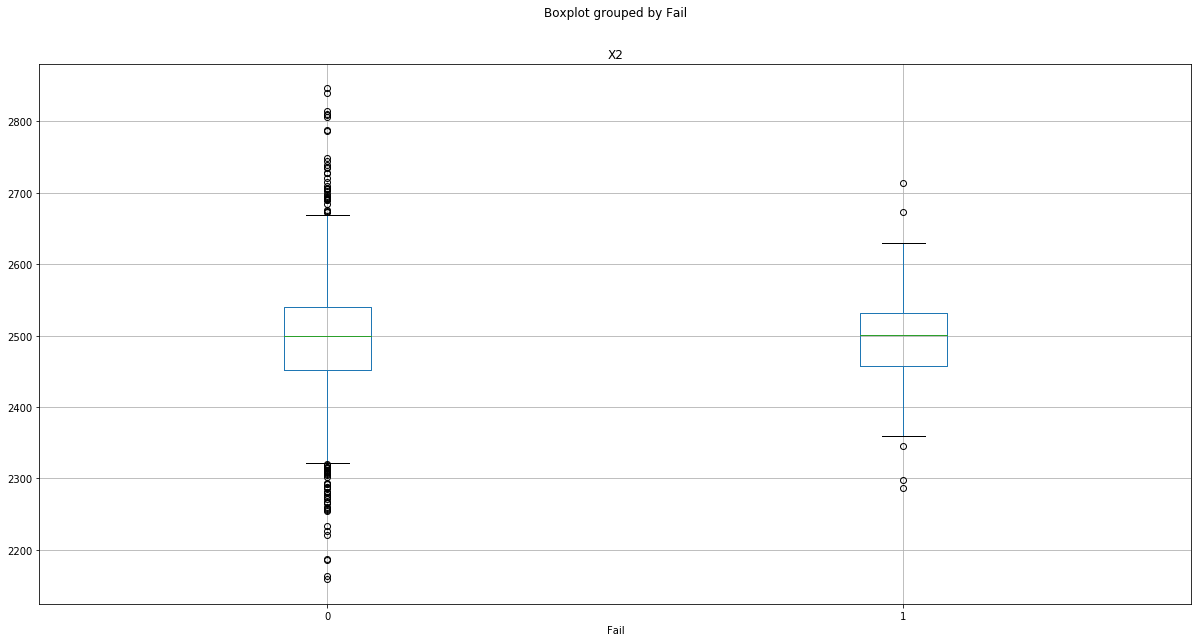

In [128]:
df.boxplot(column='X2', by = 'Fail')

In [129]:
count = 0
n=1
threshold_value=250

In [130]:
dff=df.copy()

In [131]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 593 entries, Unnamed: 0 to X590
dtypes: float64(590), int64(2), object(1)
memory usage: 7.1+ MB


**Threshold sayısından daha az NA içeren parametreler tutulduğu fonksiyon**

In [132]:
try:

    while (count < len(df.columns)-n-1):
        sys.stdout.write("-")
        if (dff.apply(lambda x: sum(x.isnull()),axis=0)[count] > threshold_value):
            print ("\n",count+n-1,'.değişken atıldı  ',"içerdiği na sayısı=",dff.apply(lambda x: sum(x.isnull()),axis=0)[count],"    toplamda atılan değişken sayısı=",n)
            dff=dff.drop(dff.columns[count],axis=1)
            n=n+1           
            count-= 1
        count= count + 1
except:
    print("out of bound")    


----------------------------------------------------------------------------
 75 .değişken atıldı   içerdiği na sayısı= 794     toplamda atılan değişken sayısı= 1
-
 76 .değişken atıldı   içerdiği na sayısı= 794     toplamda atılan değişken sayısı= 2
------------
 88 .değişken atıldı   içerdiği na sayısı= 1341     toplamda atılan değişken sayısı= 3
------------------------
 112 .değişken atıldı   içerdiği na sayısı= 1018     toplamda atılan değişken sayısı= 4
-
 113 .değişken atıldı   içerdiği na sayısı= 1018     toplamda atılan değişken sayısı= 5
-
 114 .değişken atıldı   içerdiği na sayısı= 1018     toplamda atılan değişken sayısı= 6
-
 115 .değişken atıldı   içerdiği na sayısı= 715     toplamda atılan değişken sayısı= 7
---------------------------------------------
 160 .değişken atıldı   içerdiği na sayısı= 1429     toplamda atılan değişken sayısı= 8
-
 161 .değişken atıldı   içerdiği na sayısı= 1429     toplamda atılan değişken sayısı= 9
-------------------------------------------

In [133]:
dff.apply(lambda x: sum(x.isnull()),axis=0)

Unnamed: 0     0
Fail           0
Tarih          0
X1             6
X2             7
X3            14
X4            14
X5            14
X6            14
X7            14
X8             9
X9             2
X10            2
X11            2
X12            2
X13            2
X14            3
X15            3
X16            3
X17            3
X18            3
X19            3
X20           10
X21            0
X22            2
X23            2
X24            2
X25            2
X26            2
X27            2
              ..
X537           9
X538           9
X539           9
X540           8
X541           8
X542           8
X543           2
X544           2
X545           2
X546           2
X559           1
X560           1
X561           1
X562           1
X571           0
X572           0
X573           0
X574           0
X575           0
X576           0
X577           0
X578           0
X583           1
X584           1
X585           1
X586           1
X587           1
X588          

In [134]:
dfff=dff.copy()

In [135]:
df_fail_1 = dfff.query('Fail==1')
df_fail_0 = dfff.query('Fail==0')

In [136]:
na_sayıları_1=df_fail_1.apply(lambda x: sum(x.isnull()),axis=0)
na_sayıları_0=df_fail_0.apply(lambda x: sum(x.isnull()),axis=0)


In [137]:
na_oranları_0=[]
na_oranları_1=[]
for i in range(0,len(na_sayıları_0)-1):
    na_oranları_0.append(na_sayıları_0[i]/len(na_sayıları_0))
    
for j in range(0,len(na_sayıları_1)-1):
    na_oranları_1.append(na_sayıları_1[j]/len(na_sayıları_1))


In [138]:
dropped=dfff.dropna()

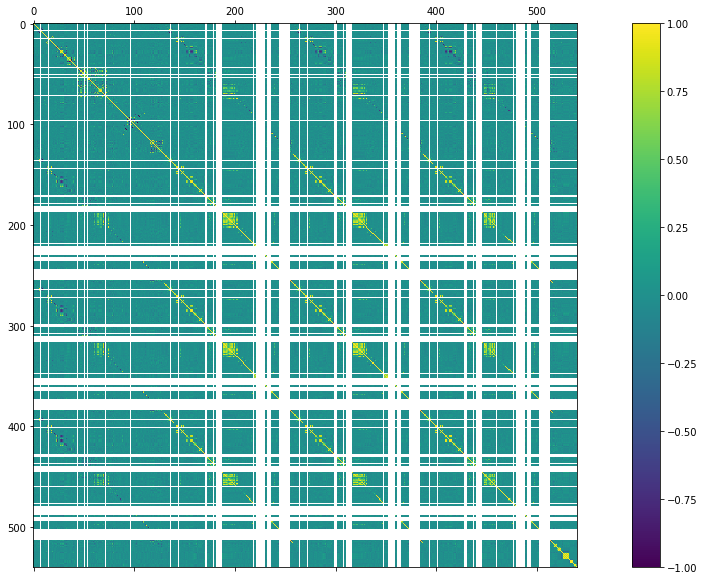

In [139]:
correlations  = dropped.corr()

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

## Na filling kısmı markdown olarak pasifize durumda

f = FloatProgress(min=0, max=len(dfff.columns))
display(f)
f.description="Filling Na's"
f.bar_style="danger"

for i in range(0,len(dfff.columns)-1):
    f.value+=1
    if ((na_sayıları_0[i]==0) & (na_sayıları_1[i]==0)):
        continue
    if (na_sayıları_0[i] < na_sayıları_1[i]):
        dfff.iloc[:,i]=dfff.iloc[:,i].fillna(df_fail_1.mean()[i])
        print("\x1b[31m fail ağırlıklı ortalama\x1b[0m",i,". değişkenin Na larına eklendi")
    if (na_sayıları_1[i] <= na_sayıları_0[i]):
        dfff.iloc[:,i]=dfff.iloc[:,i].fillna(df_fail_0.mean()[i])
        print("\x1b[32m nonfail ağırlıklı ortalama \x1b[0m",i,". değişkenin Na larına eklendi")
dfff.apply(lambda x: sum(x.isnull()),axis=0)

**Değişken tipi için**
**Parametrelerin rölatif unique değerleri hesaplanıyor**

**THRESHOLD Gerekli**

In [140]:
i=2
Threshold=0

In [141]:
a=[dropped.columns]
a[0]

Index(['Unnamed: 0', 'Fail', 'Tarih', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7',
       ...
       'X577', 'X578', 'X583', 'X584', 'X585', 'X586', 'X587', 'X588', 'X589',
       'X590'],
      dtype='object', length=541)

In [142]:
dictionary={}
dictionary

{}

In [143]:
for i in range(0,len(dropped.columns)):
    dictionary[a[0][i]]=len(set(dropped.iloc[:,i]))/len(dropped.iloc[:,i])


In [144]:
for k, v in dictionary.items():
    print (k + ' rölatif frekansı= ' + str(v))

Unnamed: 0 rölatif frekansı= 1.0
Fail rölatif frekansı= 0.0014357501794687725
Tarih rölatif frekansı= 0.9827709978463748
X1 rölatif frekansı= 0.9763101220387652
X2 rölatif frekansı= 0.9698492462311558
X3 rölatif frekansı= 0.34673366834170855
X4 rölatif frekansı= 0.3539124192390524
X5 rölatif frekansı= 0.3431442928930366
X6 rölatif frekansı= 0.0007178750897343862
X7 rölatif frekansı= 0.34816941852117733
X8 rölatif frekansı= 0.06317300789662599
X9 rölatif frekansı= 0.791816223977028
X10 rölatif frekansı= 0.3912419239052405
X11 rölatif frekansı= 0.2742282842785355
X12 rölatif frekansı= 0.26776740847092606
X13 rölatif frekansı= 0.9913854989231874
X14 rölatif frekansı= 0.0007178750897343862
X15 rölatif frekansı= 0.9956927494615937
X16 rölatif frekansı= 0.9985642498205313
X17 rölatif frekansı= 0.9526202440775305
X18 rölatif frekansı= 0.19885139985642497
X19 rölatif frekansı= 0.9921033740129217
X20 rölatif frekansı= 0.24192390524048815
X21 rölatif frekansı= 0.3840631730078966
X22 rölatif frek

In [145]:
threshold_rolative=0.20

**Rölatif Frekansı Threshold Değerinden Küçük Olan Her Sütunu Bastır.**
Markdown olarak pasifize durumda

for k, v in dictionary.items():
    if v<threshold_rolative:
        print(dropped[k])

In [146]:
for k, v in dictionary.items():
    if v<threshold_rolative:
        dropped[k]=dropped[k].astype('category')

/home/elci/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [147]:
kategorik_değişkenli_data=dropped.select_dtypes(include=['category'])

In [148]:
float_degiskenli_data=dropped.select_dtypes(include=['float'])
float_degiskenli_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393 entries, 1 to 1550
Columns: 331 entries, X1 to X590
dtypes: float64(331)
memory usage: 3.5 MB


In [149]:
print("kategorik degisken sayısı=",len(kategorik_değişkenli_data.columns),"\nfloat degisken sayısı=",len(float_degiskenli_data.columns),"\nToplam eğişken sayısı=",len(dropped.columns))

kategorik degisken sayısı= 208 
float degisken sayısı= 331 
Toplam eğişken sayısı= 541


In [150]:
hedef_fail=kategorik_değişkenli_data.iloc[:,0]

In [151]:
kategorik_değişkenli_data.drop(["Fail"],axis=1)

,X6,X8,X14,X18,X30,X41,X43,X50,X53,X54,...,X539,X543,X544,X545,X546,X583,X584,X585,X588,X589
1,100.0,0.1247,0.0,0.9701,2.2667,78.250,70.0,1.0,0.0,4.590,...,0.0,0.1096,0.0078,0.0026,7.1160,0.5019,0.0223,0.0055,0.0201,0.0060
2,100.0,0.1241,0.0,0.9674,2.3333,14.370,70.0,1.0,0.0,4.486,...,0.0,0.1096,0.0078,0.0026,7.1160,0.4958,0.0157,0.0039,0.0484,0.0148
3,100.0,0.1217,0.0,0.9687,2.6444,76.900,70.0,1.0,0.0,4.486,...,0.0,0.1096,0.0078,0.0026,7.1160,0.4990,0.0103,0.0025,0.0149,0.0044
4,100.0,0.1235,0.0,0.9735,3.1556,76.390,70.0,1.0,0.0,4.624,...,0.0,0.1096,0.0078,0.0026,7.1160,0.4800,0.4766,0.1045,0.0149,0.0044
5,100.0,0.1235,0.0,0.9747,1.6333,59.940,70.0,1.0,0.0,4.636,...,0.0,0.1096,0.0078,0.0026,7.1160,0.4949,0.0189,0.0044,0.0151,0.0052
6,100.0,0.1247,0.0,0.9667,2.4889,74.460,70.0,1.0,0.0,4.590,...,0.0,0.1096,0.0078,0.0026,7.1160,0.5010,0.0143,0.0042,0.0151,0.0052
7,100.0,0.1185,0.0,0.9687,2.7889,78.090,70.0,1.0,0.0,4.636,...,0.0,0.1096,0.0078,0.0026,7.1160,0.4984,0.0106,0.0034,0.0194,0.0063
8,100.0,0.1185,0.0,0.9693,2.1444,61.100,70.0,1.0,0.0,4.636,...,0.0,0.1096,0.0078,0.0026,7.1160,0.4993,0.0172,0.0046,0.0124,0.0045
9,100.0,0.1185,0.0,0.9667,2.3778,78.090,70.0,1.0,0.0,4.636,...,0.0,0.1096,0.0078,0.0026,7.1160,0.4967,0.0152,0.0038,0.0191,0.0073
10,100.0,0.1223,0.0,0.9664,1.9444,14.370,70.0,1.0,0.0,4.647,...,0.0,0.1096,0.0078,0.0026,7.1160,0.4925,0.0158,0.0041,0.0205,0.0071


In [152]:
float_degiskenli_data

,X1,X2,X3,X4,X5,X7,X9,X10,X11,X12,...,X572,X573,X574,X575,X576,X577,X578,X586,X587,X590
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,1.4966,-0.0005,-0.0148,0.9627,...,2.4335,5.9200,0.2653,2.0111,0.0772,1.1065,10.9003,4.4447,0.0096,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,1.4436,0.0041,0.0013,0.9615,...,2.0293,11.2100,0.1882,4.0923,0.0640,2.0952,9.2721,3.1745,0.0584,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,1.4882,-0.0124,-0.0033,0.9629,...,2.0253,9.3300,0.1738,2.8971,0.0525,1.7585,8.5831,2.0544,0.0202,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,1.5031,-0.0031,-0.0072,0.9569,...,2.0275,8.8300,0.2224,3.1776,0.0706,1.6597,10.9698,99.3032,0.0202,73.8432
5,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.3967,1.5287,0.0167,0.0055,0.9699,...,2.3236,8.9100,0.3201,2.2598,0.0899,1.6679,13.7755,3.8276,0.0342,44.0077
6,3030.27,2430.12,2230.4222,1463.6606,0.8294,102.3433,1.5816,-0.0270,0.0105,0.9591,...,2.4229,6.4800,0.2027,2.2019,0.0597,1.1958,8.3645,2.8515,0.0342,44.0077
7,3058.88,2690.15,2248.9000,1004.4692,0.7884,106.2400,1.5153,0.0157,0.0007,0.9481,...,2.2008,278.1900,0.3540,92.5866,0.1260,56.4274,16.0862,2.1261,0.0204,95.0310
8,2967.68,2600.47,2248.9000,1004.4692,0.7884,106.2400,1.5358,0.0111,-0.0066,0.9494,...,2.2170,7.0900,0.3168,2.4902,0.0878,1.3248,14.2892,3.4456,0.0111,111.6525
9,3016.11,2428.37,2248.9000,1004.4692,0.7884,106.2400,1.5381,0.0159,0.0049,0.9440,...,2.2598,3.5400,0.1676,1.0395,0.0485,0.6636,7.4181,3.0687,0.0212,90.2294
10,2994.05,2548.21,2195.1222,1046.1468,1.3204,103.3400,1.5144,-0.0190,0.0013,0.9433,...,1.8715,9.5699,0.2723,3.3618,0.0862,1.7983,14.5507,3.2115,0.0355,57.8122
